# Data Description

**Original Dataset**
US Dollar Index (DXY) daily level from (January 1994 - March 2024), accessed via Refinitiv Datastream

**Data Pre-Processing**
In order to obtain daily returns, I take log-differences. Let $p_t$ be the value of the original series at time $t$.
Then, the daily return $y_t$ is calculated as:

$$ 
y_t = log(\frac{p_t}{p_{t-1}}) = log(p_t) - log(p_{t-1})
$$

Lastly, I use a train-test split of 85:15 in this analysis.

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\libeikon\AppData\Local\Temp\ipykernel_28880\2010205936.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dxy.index = pd.to_datetime(dxy.index)


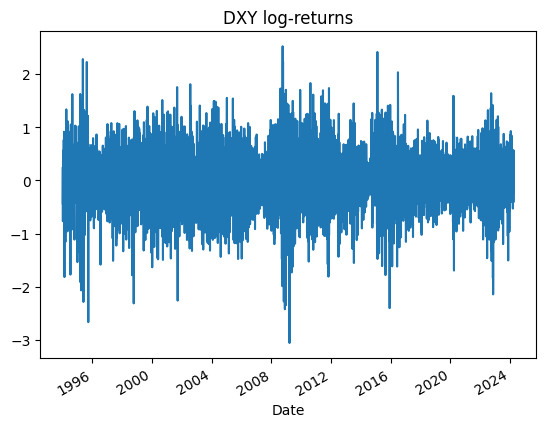

In [17]:
# Get original DXY data
dxy_path = "project/data/DXY.csv"
dxy = pd.read_csv(dxy_path, index_col='Date')
dxy.index = pd.to_datetime(dxy.index)
end_idx = dxy.index.get_loc('1994-01-03')
start_idx = dxy.index.get_loc('2024-03-27')
dxy = dxy.iloc[start_idx:end_idx+1]
# sort the data in ascending order
dxy = dxy.iloc[::-1]
dxy.columns = ['DXY']   
dxy = pd.to_numeric(dxy['DXY'], errors='coerce')
dxy = dxy.dropna()
# Get log-returns, then multiply by 100
dxy = 100 * (np.log(dxy / dxy.shift(1))).dropna()

# Send to csv
dxy.to_csv("project/data/DXY_approx_percent_returns.csv")

dxy.plot()
plt.title('DXY log-returns')
plt.show()